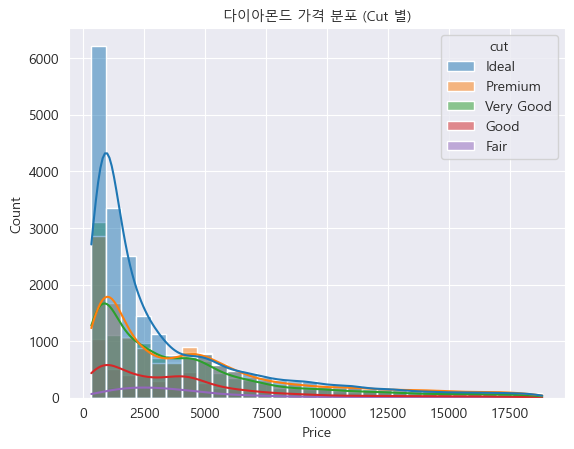

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
# 폰트 경로 설정
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path= "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# diamonds 데이터셋 불러오기
diamonds = sns.load_dataset("diamonds")

# 히스토그램 + KDE: 가격 분포를 컷별로 비교
sns.histplot(data=diamonds, x="price", hue="cut", kde=True, bins=30)
plt.title("다이아몬드 가격 분포 (Cut 별)", fontproperties=font_prop)
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

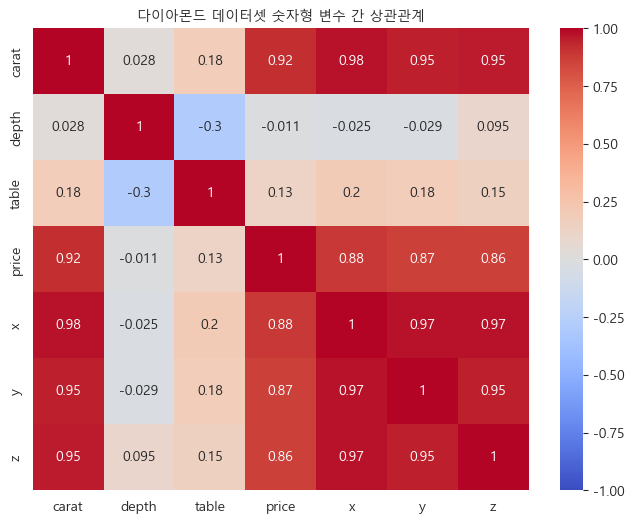

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
# 폰트 경로 설정
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path= "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 숫자형 변수 선택
num_cols = ["carat", "depth", "table", "price", "x", "y", "z"]
corr_matrix = diamonds[num_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("다이아몬드 데이터셋 숫자형 변수 간 상관관계", fontproperties=font_prop)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.536e+05
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:38:23   Log-Likelihood:            -4.7249e+05
No. Observations:               53940   AIC:                         9.450e+05
Df Residuals:                   53937   BIC:                         9.450e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4045.3332    286.205     14.134      0.0

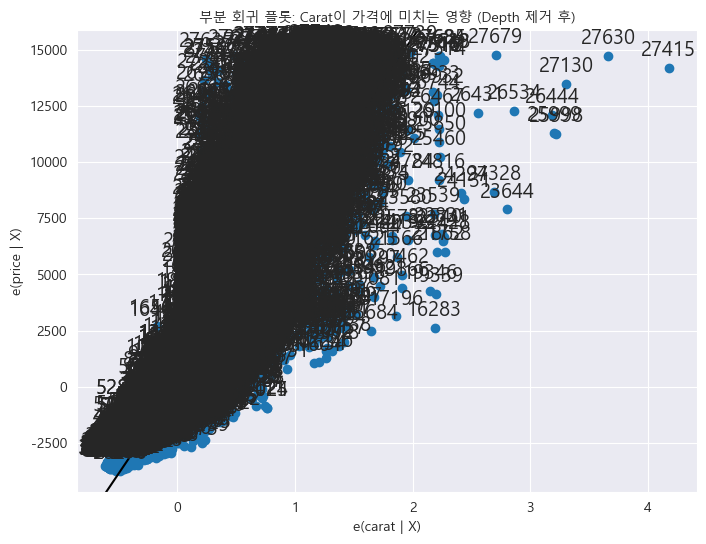

In [6]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
# 폰트 경로 설정
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path= "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 결측치 제거: price, carat, depth
diamonds_model = diamonds.dropna(subset=["price", "carat", "depth"])

# 독립 변수와 종속 변수 설정
X = diamonds_model[["carat", "depth"]]
y = diamonds_model["price"]

# 상수항 추가
X = sm.add_constant(X)

# OLS 회귀 모델 적합
model = sm.OLS(y, X).fit()
print(model.summary())

# 부분 회귀 플롯: carat의 순수 효과
fig, ax = plt.subplots(figsize=(8,6))
plot_partregress("price", "carat", ["depth"], data=diamonds_model, ax=ax)
plt.title("부분 회귀 플롯: Carat이 가격에 미치는 영향 (Depth 제거 후)", fontproperties=font_prop)
plt.show()